### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Load Dataset
df1=pd.read_csv('feature_vectors_syscalls_frequency_5_Cat.csv')
df1.head()

,__arm_nr_cacheflush,__arm_nr_set_tls,_llseek,_newselect,accept,access,bind,brk,capset,chdir,...,ugetrlimit,umask,uname,unlink,utimes,vfork,wait4,write,writev,Class
0,0.0,14.0,6.0,0.0,0.0,11.0,3.0,21.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,37.0,10.0,1.0
1,1590.0,42.0,6.0,0.0,0.0,47.0,2.0,1430.0,1.0,0.0,...,2.0,0.0,1.0,4.0,0.0,0.0,0.0,2840.0,46.0,1.0
2,0.0,23.0,6.0,0.0,0.0,40.0,9.0,89.0,1.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,111.0,20.0,1.0
3,0.0,27.0,6.0,0.0,0.0,60.0,1.0,242.0,1.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,987.0,197.0,1.0
4,0.0,18.0,6.0,0.0,0.0,26.0,5.0,59.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,98.0,25.0,1.0


In [3]:
df1.columns = [col.strip().lower().replace(" ", "_") for col in df1.columns]

In [4]:
print(df1.columns.to_list())

['__arm_nr_cacheflush', '__arm_nr_set_tls', '_llseek', '_newselect', 'accept', 'access', 'bind', 'brk', 'capset', 'chdir', 'chmod', 'chown32', 'clock_getres', 'clock_gettime', 'clone', 'close', 'connect', 'dup', 'dup2', 'epoll_create', 'epoll_ctl', 'epoll_wait', 'eventfd2', 'execve', 'exit', 'exit_group', 'faccessat', 'fchmod', 'fchown32', 'fcntl', 'fcntl64', 'fdatasync', 'flock', 'fork', 'fstat64', 'fstatfs64', 'fsync', 'ftruncate', 'ftruncate64', 'futex', 'getcwd', 'getdents64', 'getegid32', 'geteuid32', 'getgid32', 'getgroups32', 'getpeername', 'getpgid', 'getpid', 'getppid', 'getpriority', 'getresgid32', 'getresuid32', 'getrusage', 'getsockname', 'getsockopt', 'gettid', 'gettimeofday', 'getuid32', 'inotify_add_watch', 'inotify_init', 'inotify_rm_watch', 'ioctl', 'lgetxattr', 'link', 'listen', 'lseek', 'lstat64', 'madvise', 'mkdir', 'mknod', 'mlock', 'mmap2', 'mount', 'mprotect', 'mremap', 'msync', 'munlock', 'munmap', 'nanosleep', 'open', 'pipe', 'pipe2', 'poll', 'prctl', 'pread64'

In [5]:
for col in df1.columns:
    if df1[col].dtype == "object":
        df1[col].fillna(df1[col].mode()[0], inplace=True)
    else:
        df1[col].fillna(df1[col].median(), inplace=True)

In [6]:
df1.isnull().sum()

__arm_nr_cacheflush    0
__arm_nr_set_tls       0
_llseek                0
_newselect             0
accept                 0
                      ..
vfork                  0
wait4                  0
write                  0
writev                 0
class                  0
Length: 140, dtype: int64

In [7]:
df1.drop_duplicates(inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df1.select_dtypes(include="object").columns:
    df1[col] = le.fit_transform(df1[col].astype(str))


In [9]:
if "class" in df1.columns:
    df1["label"] = df1["class"].apply(lambda x: 0 if x == 1 else 1)

In [10]:
df1['label'].unique()

array([0, 1])

In [11]:
# Load
df2 = pd.read_csv('feature_vectors_syscallsbinders_frequency_5_Cat.csv')

# Standardize column names
df2.columns = [col.strip().lower().replace(" ", "_") for col in df2.columns]

# Handle missing values
for col in df2.columns:
    if df2[col].dtype == "object":
        df2[col].fillna(df2[col].mode()[0], inplace=True)
    else:
        df2[col].fillna(df2[col].median(), inplace=True)

# Encode categorical
le = LabelEncoder()
for col in df2.select_dtypes(include="object").columns:
    df2[col] = le.fit_transform(df2[col].astype(str))

# Drop duplicates
df2.drop_duplicates(inplace=True)

# Create label (0=benign, 1=fraud)
if "class" in df2.columns:
    df2["label"] = df2["class"].apply(lambda x: 0 if x == 1 else 1)



In [12]:
df2.head()

,access_personal_info___,alter_phone_state___,anti_debug_____,create_folder_____,create_process`_____,create_thread_____,device_access_____,execute_____,fs_access____,fs_access()____,...,vfork,vibrate,vibratepattern,wait4,watchrotation,windowgainedfocus,write,writev,class,label
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,37,10,1,0
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,2,2838,46,1,0
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,1,111,20,1,0
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,7,987,197,1,0
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,1,98,25,1,0


In [13]:
# Load
df2 = pd.read_csv('feature_vectors_syscallsbinders_frequency_5_Cat.csv')

# Standardize column names
df2.columns = [col.strip().lower().replace(" ", "_") for col in df2.columns]

# Handle missing values
for col in df2.columns:
    if df2[col].dtype == "object":
        df2[col].fillna(df2[col].mode()[0], inplace=True)
    else:
        df2[col].fillna(df2[col].median(), inplace=True)

# Encode categorical
le = LabelEncoder()
for col in df2.select_dtypes(include="object").columns:
    df2[col] = le.fit_transform(df2[col].astype(str))

# Drop duplicates
df2.drop_duplicates(inplace=True)

# Create label (0=benign, 1=fraud)
if "class" in df2.columns:
    df2["label"] = df2["class"].apply(lambda x: 0 if x == 1 else 1)



### EDA - csv 1

In [14]:
# Shape of dataset
print("Shape:", df1.shape)

# Column names and types
print(df1.dtypes)

print('============')
# Check null values
print(df1.isnull().sum())


Shape: (11521, 141)
__arm_nr_cacheflush    float64
__arm_nr_set_tls       float64
_llseek                float64
_newselect             float64
accept                 float64
                        ...   
wait4                  float64
write                  float64
writev                 float64
class                  float64
label                    int64
Length: 141, dtype: object
__arm_nr_cacheflush    0
__arm_nr_set_tls       0
_llseek                0
_newselect             0
accept                 0
                      ..
wait4                  0
write                  0
writev                 0
class                  0
label                  0
Length: 141, dtype: int64


Class Distribution

label
1    10268
0     1253
Name: count, dtype: int64


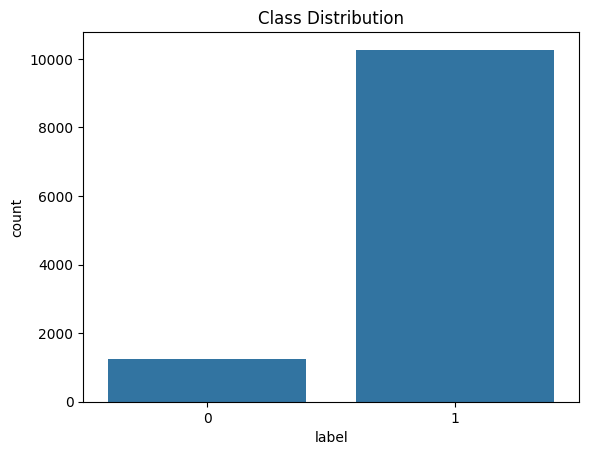

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check target column (assuming it's called "class" or similar)
print(df1['label'].value_counts())

# Plot distribution
sns.countplot(x='label', data=df1)
plt.title("Class Distribution")
plt.show()



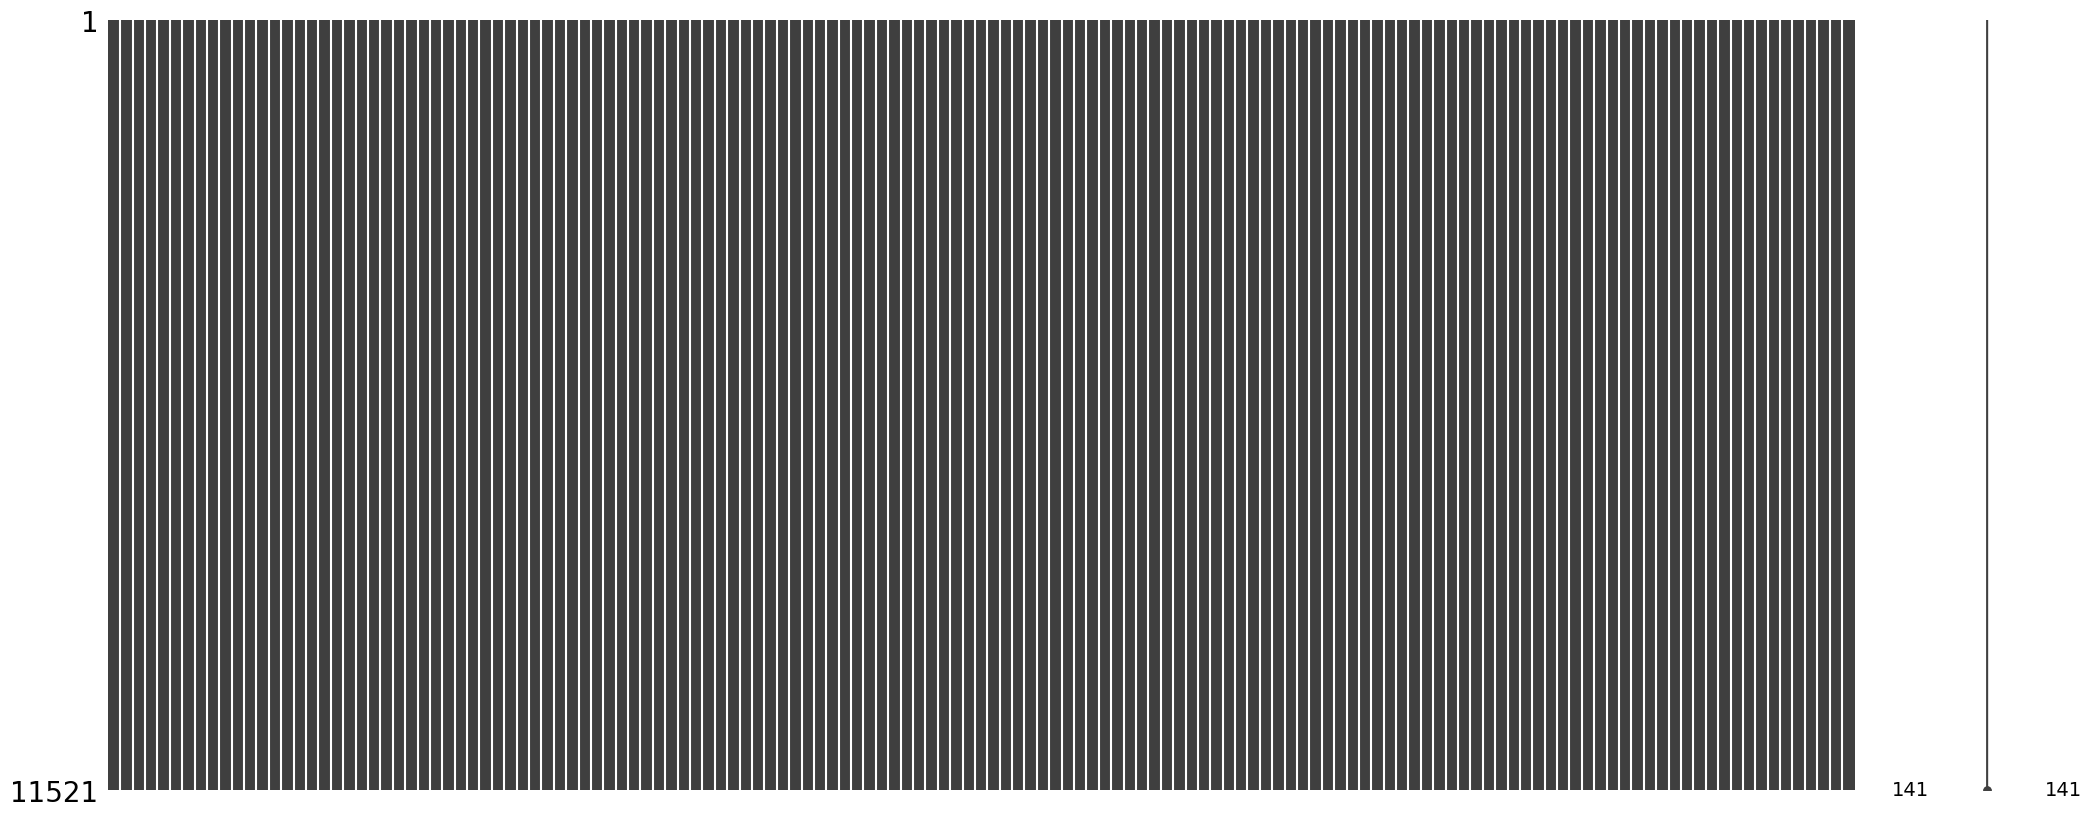

In [16]:
import missingno as msno

# Visualize missing values
msno.matrix(df1)
plt.show()


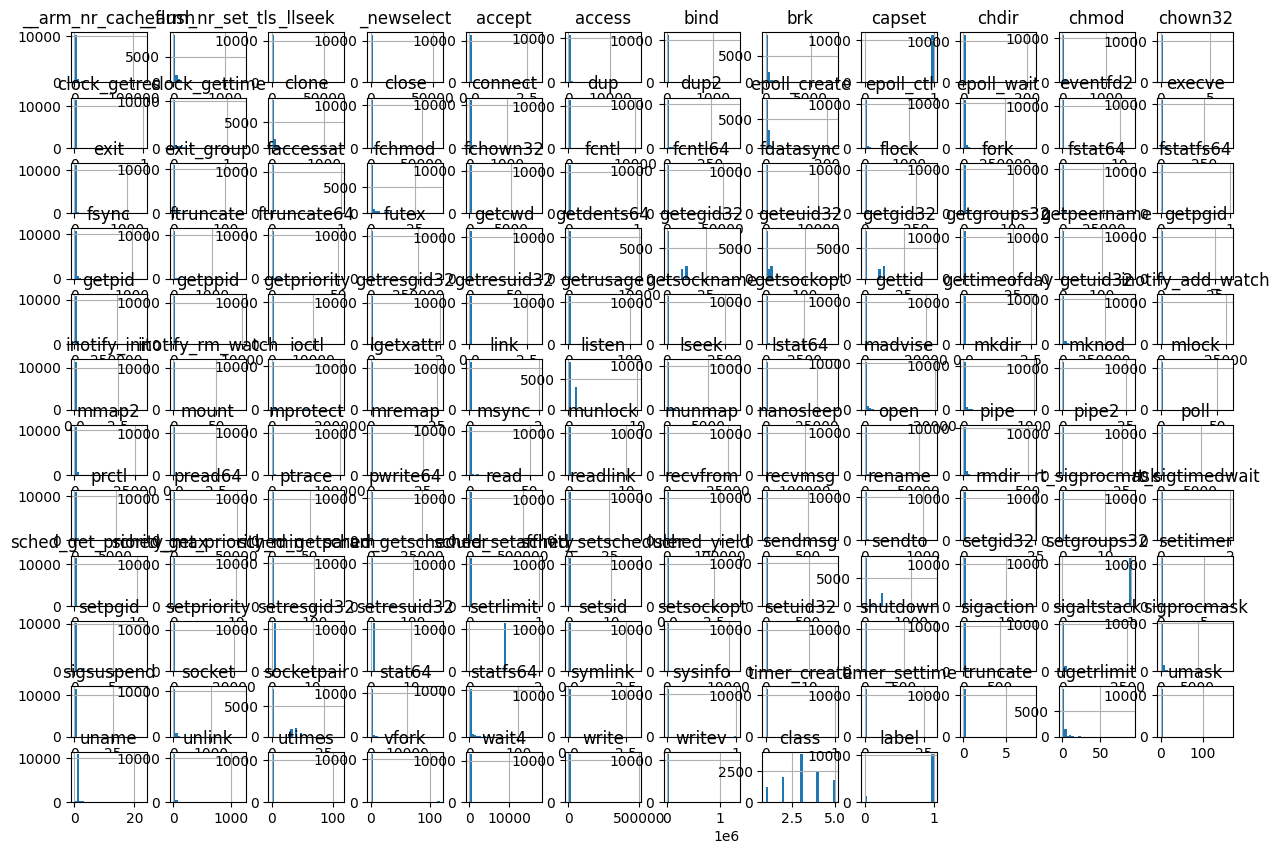

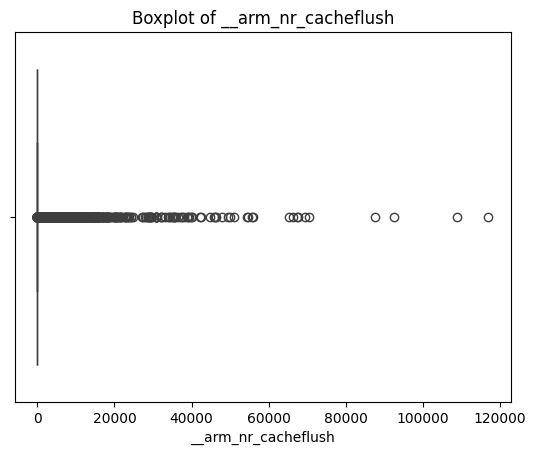

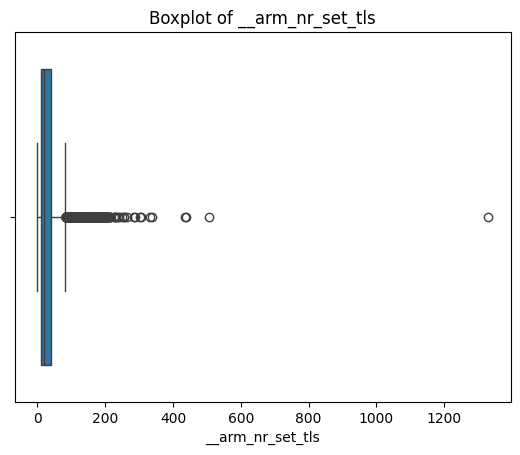

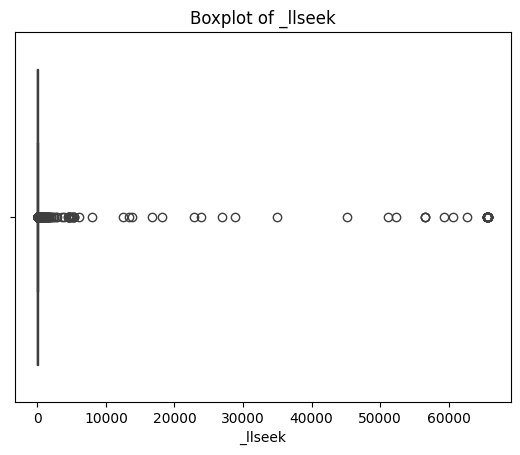

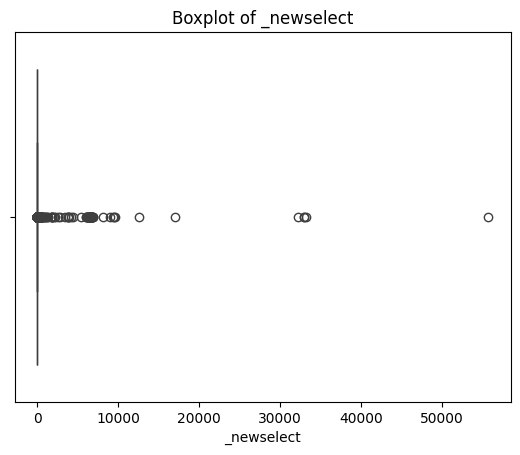

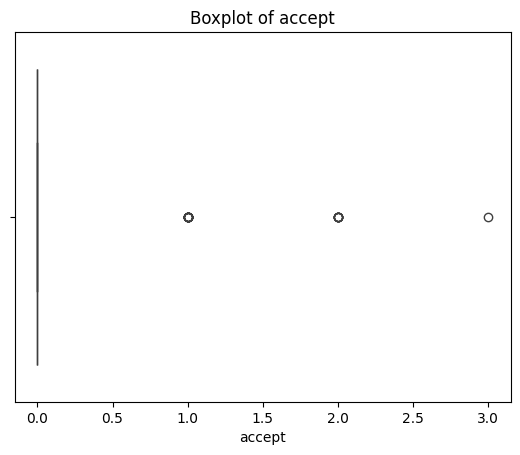

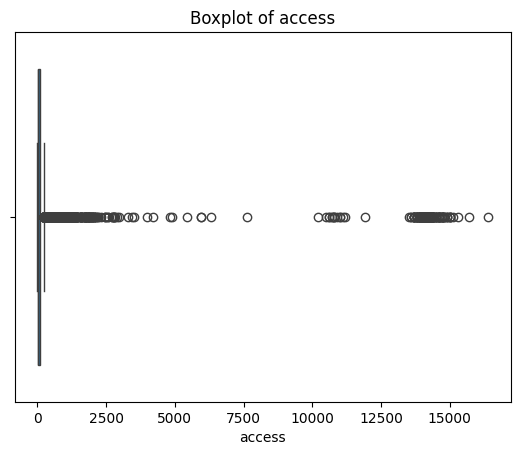

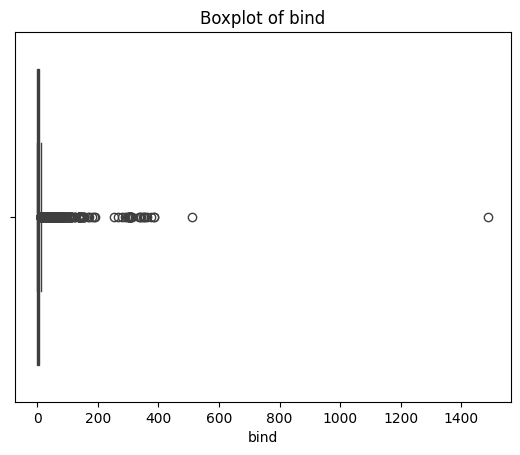

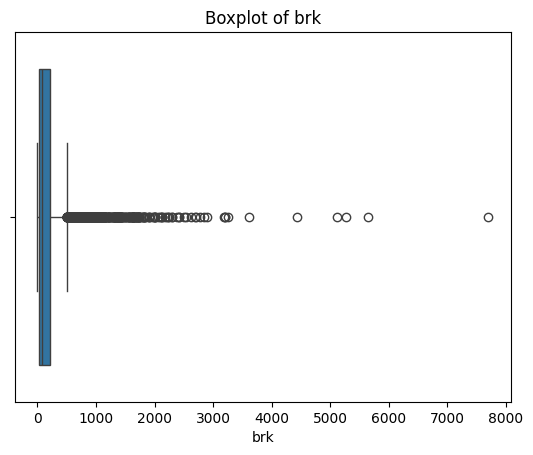

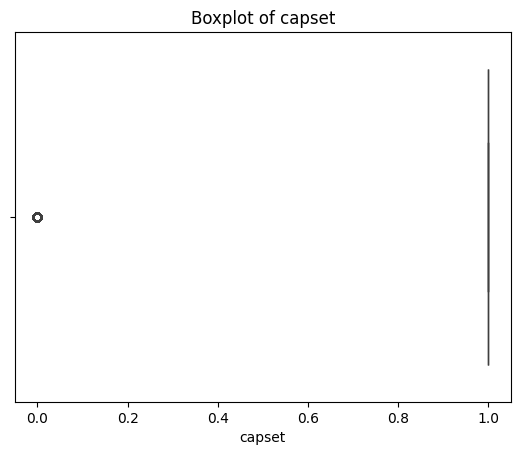

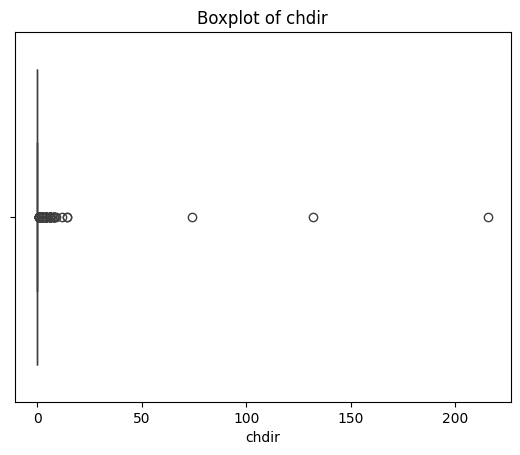

In [17]:
# Select numerical features
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns

# Histograms
df1[num_cols].hist(bins=30, figsize=(15, 10))
plt.show()

# Boxplots (outlier check)
for col in num_cols[:10]:  # just first 10 to avoid too many plots
    sns.boxplot(x=df1[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


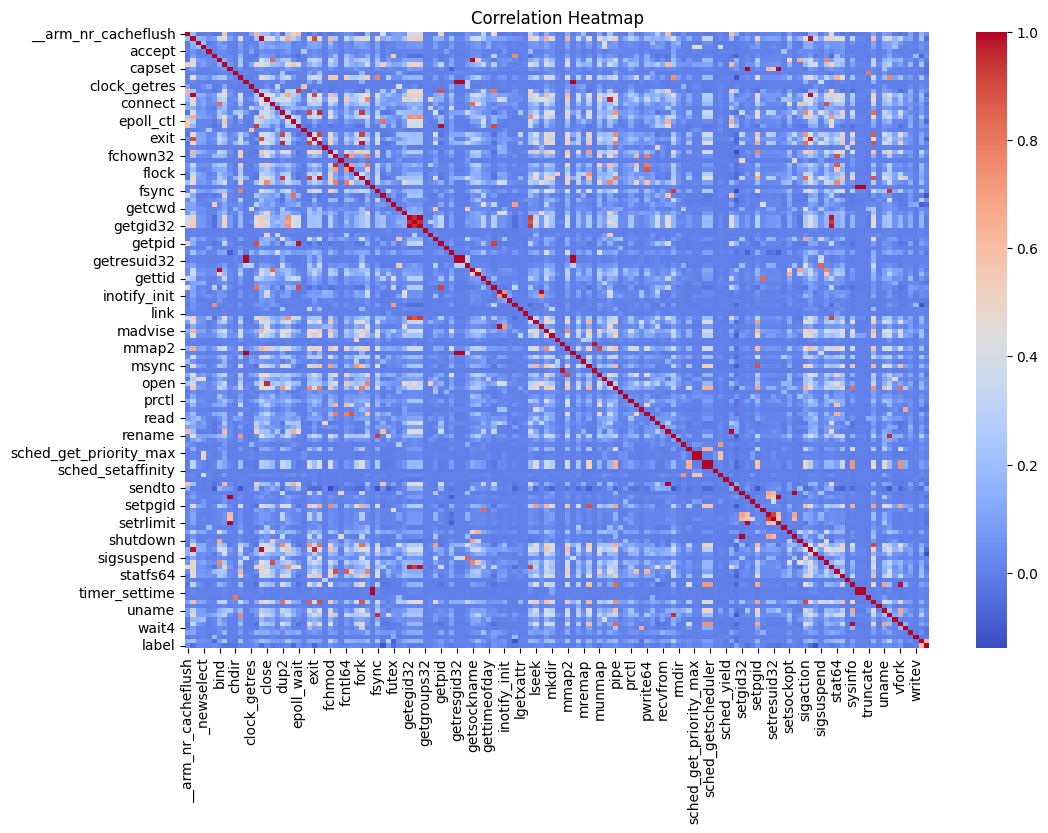

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df1[num_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


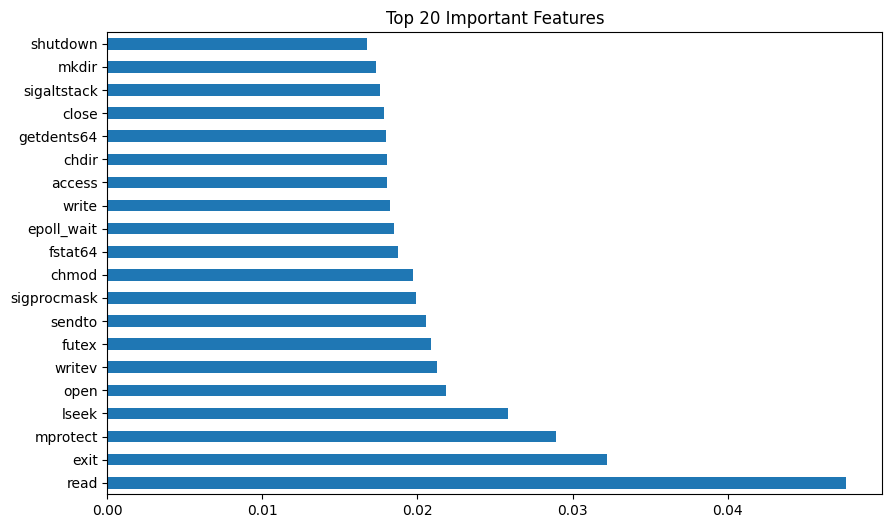

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Simple train-test split

X = df1.drop("class", axis=1)
X = X.drop("label", axis=1)
y = df1["label"]

model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X, y)

# Plot feature importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))
plt.title("Top 20 Important Features")
plt.show()


Refining Dataset

In [20]:
# Step 0: imports & sanity checks
import pandas as pd
import numpy as np

# if df1 is already in memory, copy it. Otherwise load from file:
# df1 = pd.read_csv("feature_vectors_syscalls_frequency_5_Cat.csv")

df = df1.copy()          # work on a copy
print("shape:", df.shape)
print("columns sample:", df.columns[:10].tolist())
print("label counts:\n", df['label'].value_counts())
print("class counts (original classes):\n", df.get('class', pd.Series()).value_counts())
print("\nDatatype summary:")
print(df.dtypes.value_counts())


shape: (11521, 141)
columns sample: ['__arm_nr_cacheflush', '__arm_nr_set_tls', '_llseek', '_newselect', 'accept', 'access', 'bind', 'brk', 'capset', 'chdir']
label counts:
 label
1    10268
0     1253
Name: count, dtype: int64
class counts (original classes):
 class
3.0    3903
4.0    2529
2.0    2044
5.0    1792
1.0    1253
Name: count, dtype: int64

Datatype summary:
float64    140
int64        1
Name: count, dtype: int64


In [21]:
# Step 1: separate X and y
y = df['label'].astype(int).copy()
X = df.drop(columns=['label','class'], errors='ignore').copy()   # remove 'class' (optional) as well

# quick checks
print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())
print("Number of numeric cols:", X.select_dtypes(include=[np.number]).shape[1])
print("Number of non-numeric cols:", X.select_dtypes(exclude=[np.number]).shape[1])


X shape: (11521, 139)
y distribution:
 label
1    10268
0     1253
Name: count, dtype: int64
Number of numeric cols: 139
Number of non-numeric cols: 0


In [22]:
# Step 2: missing values
missing = X.isna().sum()
print("columns with missing values:", missing[missing>0])

# Impute numeric with median
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    if X[c].isna().any():
        X[c].fillna(X[c].median(), inplace=True)

# Impute categorical (if any) with mode
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
for c in cat_cols:
    X[c].fillna(X[c].mode()[0], inplace=True)

# Confirm
print("missing after imputation:", X.isna().sum().sum())


columns with missing values: Series([], dtype: int64)
missing after imputation: 0


In [23]:
df.head()

,__arm_nr_cacheflush,__arm_nr_set_tls,_llseek,_newselect,accept,access,bind,brk,capset,chdir,...,umask,uname,unlink,utimes,vfork,wait4,write,writev,class,label
0,0.0,14.0,6.0,0.0,0.0,11.0,3.0,21.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,37.0,10.0,1.0,0
1,1590.0,42.0,6.0,0.0,0.0,47.0,2.0,1430.0,1.0,0.0,...,0.0,1.0,4.0,0.0,0.0,0.0,2840.0,46.0,1.0,0
2,0.0,23.0,6.0,0.0,0.0,40.0,9.0,89.0,1.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,111.0,20.0,1.0,0
3,0.0,27.0,6.0,0.0,0.0,60.0,1.0,242.0,1.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,987.0,197.0,1.0,0
4,0.0,18.0,6.0,0.0,0.0,26.0,5.0,59.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,98.0,25.0,1.0,0


In [24]:
# Step 3: remove zero-variance and extremely-low-variance columns
from sklearn.feature_selection import VarianceThreshold

# Remove truly constant columns
vt0 = VarianceThreshold(threshold=0.0)
vt0.fit(X.fillna(0))
keep0 = X.columns[vt0.get_support()]
dropped_const = [c for c in X.columns if c not in keep0]
print("dropped truly constant cols:", len(dropped_const))

X = X[keep0].copy()

# Optionally drop columns that are present in <1% of samples (most zeros)
nonzero_ratio = (X != 0).sum(axis=0) / X.shape[0]
low_info_cols = nonzero_ratio[nonzero_ratio < 0.01].index.tolist()   # adjust 0.01 as needed
print("low-info (present in <1% samples) cols:", len(low_info_cols))
X.drop(columns=low_info_cols, inplace=True)
print("shape after removing low-info cols:", X.shape)

dropped truly constant cols: 0
low-info (present in <1% samples) cols: 42
shape after removing low-info cols: (11521, 97)


In [25]:
# Step 4: log1p transform for highly skewed numeric features
skew_threshold = 2.0
skews = X.skew(numeric_only=True)
skewed_cols = skews[skews.abs() > skew_threshold].index.tolist()
print("Num skewed cols (|skew| > 2):", len(skewed_cols))

# apply log1p (in-place)
X[skewed_cols] = X[skewed_cols].apply(np.log1p)

# quick check: new skew
new_skews = X[skewed_cols].skew()
print("sample new skews (first 10):\n", new_skews.head(10))


Num skewed cols (|skew| > 2): 92
sample new skews (first 10):
 __arm_nr_cacheflush     1.777994
__arm_nr_set_tls        0.383276
_llseek                 1.684412
_newselect              2.946493
access                  0.949834
bind                    1.081732
brk                     0.222974
capset                 -8.336139
chdir                  13.533177
chmod                   0.708510
dtype: float64


In [26]:
# Step 5: drop highly correlated features
corr_thresh = 0.95
corr = X.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop_corr = [col for col in upper.columns if any(upper[col] > corr_thresh)]
print("Number of correlated features to drop:", len(to_drop_corr))

X.drop(columns=to_drop_corr, inplace=True)
print("shape after correlation pruning:", X.shape)


Number of correlated features to drop: 19
shape after correlation pruning: (11521, 78)


In [27]:
from sklearn.model_selection import train_test_split

X = df1.drop("label", axis=1)
y = df1["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (9216, 140)
Test shape: (2305, 140)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_bal.value_counts())


Before SMOTE: label
1    8214
0    1002
Name: count, dtype: int64
After SMOTE: label
1    8214
0    8214
Name: count, dtype: int64


### Model Training

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

results = {}
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:,1]
    results[name] = {
        "AUC": roc_auc_score(y_test, y_proba),
        "Report": classification_report(y_test, y_pred, zero_division=0)
    }

for k,v in results.items():
    print("\nModel:", k)
    print("AUC:", v["AUC"])
    print(v["Report"])


[LightGBM] [Info] Number of positive: 8214, number of negative: 8214
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21279
[LightGBM] [Info] Number of data points in the train set: 16428, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [31]:
# Quick correlation check with target
correlations = df1.corr()['label'].sort_values(ascending=False)
print(correlations.head(20))  # top correlations


label                  1.000000
class                  0.622631
sendto                 0.107138
ftruncate64            0.063521
getuid32               0.059054
setpgid                0.049809
vfork                  0.049709
msync                  0.048408
sysinfo                0.048286
fchmod                 0.048206
__arm_nr_cacheflush    0.045315
getpid                 0.044223
rename                 0.044134
mprotect               0.042917
statfs64               0.042895
access                 0.042128
sched_getscheduler     0.041994
sched_getparam         0.041994
unlink                 0.041087
pipe                   0.040430
Name: label, dtype: float64


In [32]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Feature Selection: keep top 20
X = df1.drop("label", axis=1)
y = df1["label"]

selector = SelectKBest(f_classif, k=20)
X_selected = selector.fit_transform(X, y)

# Example: Random Forest with regularization
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Stratified 5-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_selected, y, cv=cv, scoring="roc_auc")

print("Mean AUC:", np.mean(scores))


Mean AUC: 1.0


In [33]:
df1 = df1.drop(columns=['class'])
print("Shape after dropping 'class':", df1.shape)


Shape after dropping 'class': (11521, 140)


In [34]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns=['label'])
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(X_train.shape, X_test.shape)


(9216, 139) (2305, 139)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        proba = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        proba = model.predict_proba(X_test)[:,1]
    
    print(f"\n{name}")
    print("AUC:", roc_auc_score(y_test, proba))
    print(classification_report(y_test, preds))



Logistic Regression
AUC: 0.8389218200227329
              precision    recall  f1-score   support

           0       0.75      0.26      0.38       251
           1       0.92      0.99      0.95      2054

    accuracy                           0.91      2305
   macro avg       0.83      0.62      0.67      2305
weighted avg       0.90      0.91      0.89      2305


Random Forest
AUC: 0.990386070130384
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       251
           1       0.97      0.99      0.98      2054

    accuracy                           0.97      2305
   macro avg       0.96      0.89      0.92      2305
weighted avg       0.97      0.97      0.97      2305


XGBoost
AUC: 0.9925361843764183
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       251
           1       0.98      0.99      0.99      2054

    accuracy                           0.97      2305
   macro avg

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data
X = df1.drop(columns=['label'])
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Before SMOTE:", y_train.value_counts(normalize=True))

# ✅ Option 1: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_sm.value_counts(normalize=True))


Before SMOTE: label
1    0.891276
0    0.108724
Name: proportion, dtype: float64
After SMOTE: label
1    0.5
0    0.5
Name: proportion, dtype: float64


In [38]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

def objective_cat(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100,800),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'eval_metric': 'AUC',
        'verbose': 0,
        'random_seed': 42
    }
    model = CatBoostClassifier(**params)
    score = cross_val_score(model, X_train_sm, y_train_sm, cv=2, scoring="roc_auc").mean()
    return score

study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(objective_cat, n_trials=10)

best_cat_params = study_cat.best_params
print("Best CatBoost params:", best_cat_params)


[I 2025-08-31 16:05:49,481] A new study created in memory with name: no-name-58739218-7daf-4951-b4f9-509a29311b5c
[I 2025-08-31 16:06:01,259] Trial 0 finished with value: 0.9972181774493583 and parameters: {'iterations': 120, 'depth': 8, 'learning_rate': 0.2165951412199895, 'l2_leaf_reg': 8.311733427676938, 'border_count': 145}. Best is trial 0 with value: 0.9972181774493583.
[I 2025-08-31 16:08:07,725] Trial 1 finished with value: 0.9979538103242525 and parameters: {'iterations': 514, 'depth': 10, 'learning_rate': 0.10482098583982391, 'l2_leaf_reg': 6.864691432386742, 'border_count': 98}. Best is trial 1 with value: 0.9979538103242525.
[I 2025-08-31 16:09:11,071] Trial 2 finished with value: 0.9978248637360634 and parameters: {'iterations': 432, 'depth': 9, 'learning_rate': 0.11182526707744131, 'l2_leaf_reg': 4.517734014685477, 'border_count': 130}. Best is trial 1 with value: 0.9979538103242525.
[I 2025-08-31 16:09:45,630] Trial 3 finished with value: 0.9968128701619314 and parameter

Best CatBoost params: {'iterations': 487, 'depth': 10, 'learning_rate': 0.0664165673597235, 'l2_leaf_reg': 8.351760863094878, 'border_count': 38}


In [39]:
import lightgbm as lgb

def objective_lgb(trial):
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100,800),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
    }
    model = lgb.LGBMClassifier(**params)
    score = cross_val_score(model, X_train_sm, y_train_sm, cv=2, scoring="roc_auc").mean()
    return score

study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(objective_lgb, n_trials=10)

best_lgb_params = study_lgb.best_params
print("Best LightGBM params:", best_lgb_params)

[I 2025-08-31 16:12:01,288] A new study created in memory with name: no-name-993fdbf6-5d61-42e1-8df4-1f5a5cd99dc5


[LightGBM] [Info] Number of positive: 4107, number of negative: 4107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21118
[LightGBM] [Info] Number of data points in the train set: 8214, number of used features: 92
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[I 2025-08-31 16:12:04,016] Trial 0 finished with value: 0.9984429773583426 and parameters: {'num_leaves': 45, 'max_depth': 12, 'learning_rate': 0.06132301101088302, 'n_estimators': 207, 'min_child_samples': 80, 'subsample': 0.8871833307468692, 'colsample_bytree': 0.7952215946214374}. Best is trial 0 with value: 0.9984429773583426.


[LightGBM] [Info] Number of positive: 4107, number of negative: 4107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21251
[LightGBM] [Info] Number of data points in the train set: 8214, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2025-08-31 16:12:13,284] Trial 1 finished with value: 0.9987626463254757 and parameters: {'num_leaves': 58, 'max_depth': 8, 'learning_rate': 0.025827141995872202, 'n_estimators': 654, 'min_child_samples': 17, 'subsample': 0.987822963206371, 'colsample_bytree': 0.8354308150689066}. Best is trial 1 with value: 0.9987626463254757.


[LightGBM] [Info] Number of positive: 4107, number of negative: 4107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21263
[LightGBM] [Info] Number of data points in the train set: 8214, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2025-08-31 16:12:25,186] Trial 2 finished with value: 0.9989020272122952 and parameters: {'num_leaves': 62, 'max_depth': 9, 'learning_rate': 0.023457811110075052, 'n_estimators': 750, 'min_child_samples': 14, 'subsample': 0.9261579177148102, 'colsample_bytree': 0.8647877298604141}. Best is trial 2 with value: 0.9989020272122952.


[LightGBM] [Info] Number of positive: 4107, number of negative: 4107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21138
[LightGBM] [Info] Number of data points in the train set: 8214, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[I 2025-08-31 16:12:27,135] Trial 3 finished with value: 0.9979408712010928 and parameters: {'num_leaves': 173, 'max_depth': 3, 'learning_rate': 0.06880139396096553, 'n_estimators': 660, 'min_child_samples': 71, 'subsample': 0.980533234994797, 'colsample_bytree': 0.6283893158084105}. Best is trial 2 with value: 0.9989020272122952.


[LightGBM] [Info] Number of positive: 4107, number of negative: 4107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21244
[LightGBM] [Info] Number of data points in the train set: 8214, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2025-08-31 16:12:32,247] Trial 4 finished with value: 0.9969071790286724 and parameters: {'num_leaves': 68, 'max_depth': 9, 'learning_rate': 0.015559139044007284, 'n_estimators': 253, 'min_child_samples': 32, 'subsample': 0.9651200593522349, 'colsample_bytree': 0.9188268106113184}. Best is trial 2 with value: 0.9989020272122952.


[LightGBM] [Info] Number of positive: 4107, number of negative: 4107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21220
[LightGBM] [Info] Number of data points in the train set: 8214, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2025-08-31 16:12:35,316] Trial 5 finished with value: 0.9987537534573249 and parameters: {'num_leaves': 180, 'max_depth': 8, 'learning_rate': 0.2917565106119976, 'n_estimators': 449, 'min_child_samples': 50, 'subsample': 0.6353067219510902, 'colsample_bytree': 0.7527994583502752}. Best is trial 2 with value: 0.9989020272122952.


[LightGBM] [Info] Number of positive: 4107, number of negative: 4107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21258
[LightGBM] [Info] Number of data points in the train set: 8214, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2025-08-31 16:12:38,549] Trial 6 finished with value: 0.9989327076074159 and parameters: {'num_leaves': 117, 'max_depth': 9, 'learning_rate': 0.2354832546034079, 'n_estimators': 173, 'min_child_samples': 15, 'subsample': 0.7942241150161219, 'colsample_bytree': 0.8723490764163043}. Best is trial 6 with value: 0.9989327076074159.


[LightGBM] [Info] Number of positive: 4107, number of negative: 4107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21247
[LightGBM] [Info] Number of data points in the train set: 8214, number of used features: 106
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2025-08-31 16:12:40,415] Trial 7 finished with value: 0.9982078795673253 and parameters: {'num_leaves': 197, 'max_depth': 4, 'learning_rate': 0.10018070642329298, 'n_estimators': 280, 'min_child_samples': 24, 'subsample': 0.7022459777901336, 'colsample_bytree': 0.8153055178323056}. Best is trial 6 with value: 0.9989327076074159.


[LightGBM] [Info] Number of positive: 4107, number of negative: 4107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21251
[LightGBM] [Info] Number of data points in the train set: 8214, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2025-08-31 16:12:43,806] Trial 8 finished with value: 0.9984045305250366 and parameters: {'num_leaves': 132, 'max_depth': 4, 'learning_rate': 0.08445367932275125, 'n_estimators': 501, 'min_child_samples': 19, 'subsample': 0.9781075492787391, 'colsample_bytree': 0.7294728668200129}. Best is trial 6 with value: 0.9989327076074159.


[LightGBM] [Info] Number of positive: 4107, number of negative: 4107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21118
[LightGBM] [Info] Number of data points in the train set: 8214, number of used features: 92
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[I 2025-08-31 16:12:46,683] Trial 9 finished with value: 0.9985286156786364 and parameters: {'num_leaves': 117, 'max_depth': 8, 'learning_rate': 0.07521797736962502, 'n_estimators': 313, 'min_child_samples': 91, 'subsample': 0.7208302381984879, 'colsample_bytree': 0.6161890510378217}. Best is trial 6 with value: 0.9989327076074159.


Best LightGBM params: {'num_leaves': 117, 'max_depth': 9, 'learning_rate': 0.2354832546034079, 'n_estimators': 173, 'min_child_samples': 15, 'subsample': 0.7942241150161219, 'colsample_bytree': 0.8723490764163043}


In [40]:
import xgboost as xgb

def objective_xgb(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'tree_method': 'hist',
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100,800),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }
    model = xgb.XGBClassifier(**params, use_label_encoder=False)
    score = cross_val_score(model, X_train_sm, y_train_sm, cv=2, scoring="roc_auc").mean()
    return score

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=10)

best_xgb_params = study_xgb.best_params
print("Best XGBoost params:", best_xgb_params)


[I 2025-08-31 16:12:46,723] A new study created in memory with name: no-name-e972b0c6-d65f-43c2-89fd-bb6d8ceb1ff6
[I 2025-08-31 16:12:50,175] Trial 0 finished with value: 0.9888996403664834 and parameters: {'max_depth': 4, 'learning_rate': 0.013412207776129217, 'n_estimators': 292, 'subsample': 0.9222310056538885, 'colsample_bytree': 0.8834677597174778, 'gamma': 1.2551716833937232, 'min_child_weight': 2}. Best is trial 0 with value: 0.9888996403664834.
[I 2025-08-31 16:12:55,548] Trial 1 finished with value: 0.9962781716429082 and parameters: {'max_depth': 5, 'learning_rate': 0.03269388009378486, 'n_estimators': 345, 'subsample': 0.8897515609196704, 'colsample_bytree': 0.63302622921889, 'gamma': 4.276036694419314, 'min_child_weight': 1}. Best is trial 1 with value: 0.9962781716429082.
[I 2025-08-31 16:12:57,336] Trial 2 finished with value: 0.995829422694564 and parameters: {'max_depth': 7, 'learning_rate': 0.1823103310604744, 'n_estimators': 177, 'subsample': 0.9297436663051483, 'cols

Best XGBoost params: {'max_depth': 12, 'learning_rate': 0.10356428156195167, 'n_estimators': 540, 'subsample': 0.7476152179765991, 'colsample_bytree': 0.8175871128930672, 'gamma': 0.3244000981062922, 'min_child_weight': 10}


In [41]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import joblib

# Define tuned models
cat = CatBoostClassifier(**best_cat_params, verbose=0, random_seed=42)
lgbm = lgb.LGBMClassifier(**best_lgb_params, random_state=42)
xgbm = xgb.XGBClassifier(**best_xgb_params, use_label_encoder=False, random_state=42)

# Stacking
stack_model = StackingClassifier(
    estimators=[('cat', cat), ('lgbm', lgbm), ('xgbm', xgbm)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1
)

# Train
stack_model.fit(X_train_sm, y_train_sm)

# Evaluate
y_pred = stack_model.predict(X_test)
y_prob = stack_model.predict_proba(X_test)[:,1]

print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

joblib.dump(stack_model, "model_syscalls.pkl")
print("✅ Model saved as model_syscalls.pkl")

AUC: 0.9935525667534342
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       251
           1       0.99      0.98      0.99      2054

    accuracy                           0.97      2305
   macro avg       0.93      0.94      0.93      2305
weighted avg       0.97      0.97      0.97      2305

✅ Model saved as model_syscalls.pkl


# ========================================================================= CSV 2 =================================================================

In [42]:
print("Null values:\n", df2.isnull().sum().sum())

Null values:
 0


In [43]:
# Drop 'class' column if exists (not useful for modeling)
if 'class' in df2.columns:
    df2 = df2.drop(columns=['class'])
    print("Dropped column: class")

# Step 2.1: Drop constant cols
constant_cols = [c for c in df2.columns if df2[c].nunique() == 1]
print("Truly constant cols:", len(constant_cols))
df2 = df2.drop(columns=constant_cols)

# Step 2.2: Drop low-information cols (<1% non-zero / positive values)
low_info_cols = []
threshold = 0.01 * len(df2)
for col in df2.drop(columns=['label']).columns:
    if (df2[col] != 0).sum() < threshold:
        low_info_cols.append(col)

print("Low-info cols:", len(low_info_cols))
df2 = df2.drop(columns=low_info_cols)

print("Shape after cleaning:", df2.shape)


Dropped column: class
Truly constant cols: 0
Low-info cols: 247
Shape after cleaning: (11526, 224)


In [44]:
import numpy as np

# Compute correlation matrix (absolute values)
corr_matrix = df2.drop(columns=['label']).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.95
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"Number of correlated features to drop: {len(to_drop_corr)}")

# Drop them
df2 = df2.drop(columns=to_drop_corr)

print("Shape after correlation pruning:", df2.shape)


Number of correlated features to drop: 38
Shape after correlation pruning: (11526, 186)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Split data
X = df2.drop(columns=['label'])
y = df2['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]
print("\nLogistic Regression")
print("AUC:", roc_auc_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr))

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]
print("\nRandom Forest")
print("AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))

# 3. XGBoost
xgb = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]
print("\nXGBoost")
print("AUC:", roc_auc_score(y_test, y_prob_xgb))
print(classification_report(y_test, y_pred_xgb))

# 4. LightGBM
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=-1, subsample=0.8, colsample_bytree=0.8, random_state=42, class_weight='balanced')
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
y_prob_lgbm = lgbm.predict_proba(X_test)[:,1]
print("\nLightGBM")
print("AUC:", roc_auc_score(y_test, y_prob_lgbm))
print(classification_report(y_test, y_pred_lgbm))

# 5. CatBoost
cat = CatBoostClassifier(iterations=300, depth=6, learning_rate=0.1, random_seed=42, verbose=0, class_weights=[1,5])
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
y_prob_cat = cat.predict_proba(X_test)[:,1]
print("\nCatBoost")
print("AUC:", roc_auc_score(y_test, y_prob_cat))
print(classification_report(y_test, y_pred_cat))



Logistic Regression
AUC: 0.8398600246217077
              precision    recall  f1-score   support

           0       0.35      0.69      0.46       251
           1       0.96      0.84      0.90      2055

    accuracy                           0.82      2306
   macro avg       0.65      0.77      0.68      2306
weighted avg       0.89      0.82      0.85      2306


Random Forest
AUC: 0.9938426343288647
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       251
           1       0.98      0.99      0.99      2055

    accuracy                           0.98      2306
   macro avg       0.96      0.91      0.93      2306
weighted avg       0.98      0.98      0.97      2306


XGBoost
AUC: 0.9935033588274639
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       251
           1       0.99      0.99      0.99      2055

    accuracy                           0.98      2306
   macro av

In [46]:
import pandas as pd
import numpy as np

# ML + preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

# Optuna
import optuna
from optuna.samplers import TPESampler

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Before SMOTE:", np.bincount(y_train))

# -------------------------
# STEP 2: Apply SMOTE
# -------------------------
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_train_res))

# -------------------------
# STEP 3: Fast Optuna Tuning for each model
# -------------------------

def objective_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 6),
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.2),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "eval_metric": "logloss",
        "random_state": 42,
        "use_label_encoder": False
    }
    model = XGBClassifier(**params)
    scores = cross_val_score(model, X_train_res, y_train_res, cv=3, scoring="roc_auc", n_jobs=-1)
    return np.mean(scores)

def objective_lgbm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 6),
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.2),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "random_state": 42
    }
    model = LGBMClassifier(**params)
    scores = cross_val_score(model, X_train_res, y_train_res, cv=3, scoring="roc_auc", n_jobs=-1)
    return np.mean(scores)

def objective_cat(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 200, 500),
        "depth": trial.suggest_int("depth", 4, 7),
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.2),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 5),
        "random_seed": 42,
        "verbose": 0
    }
    model = CatBoostClassifier(**params)
    scores = cross_val_score(model, X_train_res, y_train_res, cv=3, scoring="roc_auc", n_jobs=-1)
    return np.mean(scores)

# -------------------------
# STEP 4: Run Fast Optimization (10 trials each)
# -------------------------
sampler = TPESampler(seed=42)

study_xgb = optuna.create_study(direction="maximize", sampler=sampler)
study_xgb.optimize(objective_xgb, n_trials=10)

study_lgbm = optuna.create_study(direction="maximize", sampler=sampler)
study_lgbm.optimize(objective_lgbm, n_trials=10)

study_cat = optuna.create_study(direction="maximize", sampler=sampler)
study_cat.optimize(objective_cat, n_trials=10)

print("Best XGB params:", study_xgb.best_params)
print("Best LGBM params:", study_lgbm.best_params)
print("Best CatBoost params:", study_cat.best_params)

# -------------------------
# STEP 5: Build Models with Best Params
# -------------------------
xgb_best = XGBClassifier(**study_xgb.best_params, use_label_encoder=False, eval_metric="logloss", random_state=42)
lgbm_best = LGBMClassifier(**study_lgbm.best_params, random_state=42)
cat_best = CatBoostClassifier(**study_cat.best_params, random_seed=42, verbose=0)

# -------------------------
# STEP 6: Stacking Ensemble
# -------------------------
estimators = [
    ("xgb", xgb_best),
    ("lgbm", lgbm_best),
    ("cat", cat_best)
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=200, random_state=42),
    cv=3,
    n_jobs=-1
)

stack_model.fit(X_train_res, y_train_res)

# -------------------------
# STEP 7: Evaluation
# -------------------------
y_pred = stack_model.predict(X_test)
y_proba = stack_model.predict_proba(X_test)[:, 1]

print("AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


joblib.dump(stack_model, "stacking_ensemble_model_binders.pkl")
print("✅ Model saved as stacking_ensemble_model_binders.pkl")


Before SMOTE: [1002 8218]
After SMOTE:

[I 2025-08-31 16:17:29,483] A new study created in memory with name: no-name-1b06c481-817e-4ba2-910c-f0a0f0068331


 [8218 8218]


[I 2025-08-31 16:17:38,940] Trial 0 finished with value: 0.9991048480070535 and parameters: {'n_estimators': 175, 'max_depth': 6, 'learning_rate': 0.15979909127171077, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746}. Best is trial 0 with value: 0.9991048480070535.
[I 2025-08-31 16:17:45,971] Trial 1 finished with value: 0.9975316047126334 and parameters: {'n_estimators': 131, 'max_depth': 3, 'learning_rate': 0.1799264218662403, 'subsample': 0.8404460046972835, 'colsample_bytree': 0.8832290311184181}. Best is trial 0 with value: 0.9991048480070535.
[I 2025-08-31 16:17:49,427] Trial 2 finished with value: 0.9989055772561989 and parameters: {'n_estimators': 104, 'max_depth': 6, 'learning_rate': 0.17486639612006327, 'subsample': 0.6849356442713105, 'colsample_bytree': 0.6727299868828402}. Best is trial 0 with value: 0.9991048480070535.
[I 2025-08-31 16:17:52,413] Trial 3 finished with value: 0.998216960334453 and parameters: {'n_estimators': 136, 'max_depth': 4, 'l

Best XGB params: {'n_estimators': 175, 'max_depth': 6, 'learning_rate': 0.15979909127171077, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746}
Best LGBM params: {'n_estimators': 294, 'max_depth': 6, 'learning_rate': 0.19092484123462838, 'subsample': 0.9579309401710595, 'colsample_bytree': 0.8391599915244341}
Best CatBoost params: {'iterations': 443, 'depth': 7, 'learning_rate': 0.09770052124577959, 'l2_leaf_reg': 1.440207698110707}
AUC: 0.9896133228642607
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       251
           1       0.99      0.99      0.99      2055

    accuracy                           0.98      2306
   macro avg       0.95      0.94      0.95      2306
weighted avg       0.98      0.98      0.98      2306

✅ Model saved as stacking_ensemble_model_binders.pkl
